## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 35 columns):
DAMAGE_PROPERTY       11959 non-null float64
DURATION_SECONDS      11959 non-null float64
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
TOR_LENGTH            11959 non-null float64
TOR_WIDTH             11959 non-null float64
YEAR                  11959 non-null float64
MULTI_VORT_IND        11959 non-null int64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null f

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 1 columns):
DAMAGE_PROPERTY    11959 non-null float64
dtypes: float64(1)
memory usage: 93.5 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:34]

tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 24 columns):
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null float64
CULT_CROPS_PROP       11959 non-null float64
WOOD_WETLAND_PROP     11959 non-null float64
HERB_WETLAND_PROP     11959 non-null float64
INCOME                11959 non-null float64
MOB_HOME_DENS         11959 non-null float64
POP_DENS              11959 non-null

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
-1.4219
 0.1532
 0.2814
[torch.DoubleTensor of size 11959x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
 1.1642e+00 -1.2164e+00  2.8103e-01  ...  -1.3975e+00 -1.6350e+00  7.8164e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.DoubleTensor of size 11959x24]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
 1.1642e+00 -1.2164e+00  2.8103e-01  ...  -1.3975e+00 -1.6350e+00  7.8164e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.FloatTensor of size 11959x24]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

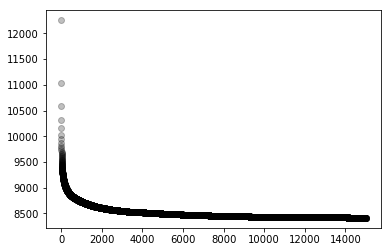

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(11959)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

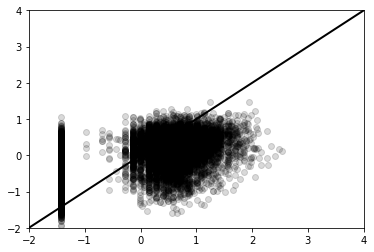

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 1 columns):
DAMAGE_PROPERTY    3987 non-null float64
dtypes: float64(1)
memory usage: 31.2 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 2:34]

valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 24 columns):
BEGIN_LAT             3987 non-null float64
BEGIN_LON             3987 non-null float64
OPEN_WATER_PROP       3987 non-null float64
DEV_OPEN_PROP         3987 non-null float64
DEV_LOW_PROP          3987 non-null float64
DEV_MED_PROP          3987 non-null float64
DEV_HIGH_PROP         3987 non-null float64
BARREN_LAND_PROP      3987 non-null float64
DECID_FOREST_PROP     3987 non-null float64
EVERGR_FOREST_PROP    3987 non-null float64
MIXED_FOREST_PROP     3987 non-null float64
SHRUB_SCRUB_PROP      3987 non-null float64
GRASS_LAND_PROP       3987 non-null float64
PASTURE_HAY_PROP      3987 non-null float64
CULT_CROPS_PROP       3987 non-null float64
WOOD_WETLAND_PROP     3987 non-null float64
HERB_WETLAND_PROP     3987 non-null float64
INCOME                3987 non-null float64
MOB_HOME_DENS         3987 non-null float64
POP_DENS              3987 non-null float64
TOT_DEV_INT  

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss - Residual sum of squares
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3112.4504
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.2090
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(3987)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

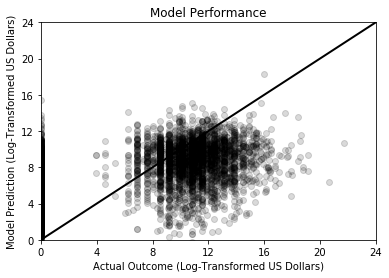

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [24]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0264  0.1977  0.0953  0.1162 -0.0830 -0.1268  0.1333  0.0646 -0.3384  0.3357
 0.1756  0.1916  0.0680  0.0492 -0.0426 -0.1148  0.0063 -0.0074 -0.3582  0.1791
 0.3961  0.1807 -0.2835 -0.0862  0.2233 -0.3067 -0.0153  0.2441 -0.0641 -0.2121
 0.2498  0.2831  0.1177  0.3746 -0.4449  0.3103 -0.0838  0.0766  0.2188  0.1226
 0.1838  0.1745  0.0334 -0.0060  0.1428 -0.3241  0.3399 -0.0772  0.1000 -0.1488
-0.4823  0.0603  0.0370 -0.2497  0.2571 -0.4905  0.4171  0.0164 -0.4057 -0.1846
 0.0344  0.0902 -0.0812  0.1139 -0.3215  0.0963  0.0306 -0.5251 -0.1777  0.3678
-0.4298 -0.2217 -0.0605  0.6653 -0.1870  0.3192 -0.0531  0.0280  0.4310 -0.0266
 0.0716 -0.2324  0.1069 -0.1946 -0.1866  0.0446  0.0841 -0.0157  0.0548  0.1321
 0.2080 -0.1343 -0.0037  0.4797 -0.1964  0.1578 -0.0336 -0.0744  0.2041 -0.0156
-0.1796 -0.1306 -0.2078 -0.2027 -0.3005 -0.3123  0.2572  0.1439 -0.1301 -0.4036
-0.0198  0.1382 -0.0098 -0.2056 -0.3348 -0.1951  0.0249  0.0875  0.3237 -0.1081
-

In [25]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.6525  0.5375  0.3975  0.4799  0.5768  0.5754  0.5343  0.3400 -0.5182 -0.5851

Columns 10 to 15 
-0.5772  0.6955 -0.4867  0.6115 -0.5241 -0.5871
[torch.FloatTensor of size 1x16]

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

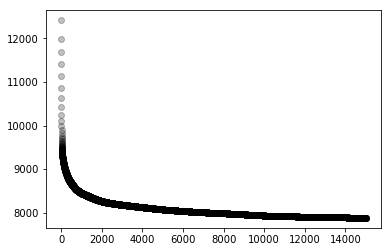

In [29]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

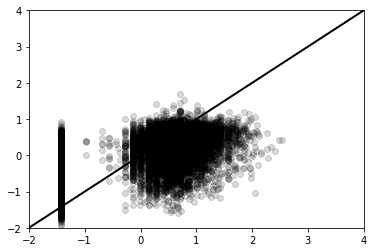

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [32]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3210.9221
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.1840
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

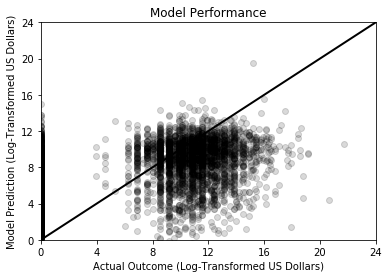

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [36]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1961  0.1066 -0.0825 -0.3211 -0.0260 -0.0984  0.0935 -0.2313  0.1931  0.2948
 0.8557  0.1749 -0.2249 -0.4501  0.0483  0.3636 -0.1254 -0.4800 -0.1716 -0.0319
-0.0539  0.0819 -0.0682 -0.0185 -0.2113 -0.0401 -0.0875 -0.2514  0.4007  0.2018
 0.1236  0.4209 -0.1199 -0.1691  0.0656 -0.3254  0.2341 -0.1052  0.3772  0.2856
 0.0455 -0.1361 -0.0573  0.1905 -0.0300  0.0036 -0.0871 -0.1556 -0.5136 -0.1296
 0.1979 -0.3838  0.2015  0.0991 -0.2127  0.6272 -0.4376 -0.0419 -0.1768  0.4327
-0.0276  0.0258  0.1345  0.1613  0.0863 -0.1908 -0.0916 -0.1155 -0.0567  0.2222
-0.2612 -0.4756 -0.1210 -0.1277 -0.4343 -0.1691  0.0288 -0.1654 -0.0561  0.1165
 0.2101  0.0068  0.0325  0.2029  0.2181 -0.2157 -0.1609 -0.0402 -0.0702 -0.3100
-0.4792  0.0238 -0.1202 -0.3363  0.3136 -0.5890  0.0748 -0.0415  0.1463 -0.2909
 0.0299  0.0789  0.0174  0.0975  0.0741 -0.1151  0.0563 -0.1100 -0.0405  0.2951
 0.3726 -0.3841  0.0988  0.1609  0.0283  0.3128 -0.3270  0.0035 -0.0413  0.3817
 

In [37]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0379  0.1930 -0.0211  0.4209 -0.1287  0.0487  0.1196 -0.0469  0.4550 -0.2640
 0.4642 -0.2711 -0.3648 -0.1986 -0.0995  1.0134 -0.4972  0.1957  0.5976 -0.6786
 0.7136 -0.0867  0.0741  0.4681 -0.0958 -0.6232 -0.1339  0.3074  0.1036 -0.0073
 0.4752 -0.3253 -0.0822 -0.9423 -0.2018 -0.1558  0.0565  0.1776  0.2076  0.4751
-0.8373  0.1287 -1.2649 -0.7433  0.9061 -0.5860  0.6053 -1.4245 -0.2641  0.1216
 0.1619 -0.2164 -0.5043  0.2845 -0.6294 -0.2746 -0.0178  0.2365 -0.7029 -0.0826
 0.0835  0.0707  0.7673 -0.6454  0.1968 -0.0183 -0.1568 -0.6384  0.0535  0.1227
 0.4107 -0.0773  0.0289 -0.1501 -0.5076  0.4259  0.0563  0.2532 -0.3033  0.1400
 0.2492  0.1781  0.5166  0.1071  0.2800 -0.0595  0.4521 -0.3533 -0.2503  0.1176
 0.0141 -0.8174  0.3519 -0.2850  0.7294  0.6723 -0.3245 -0.3835 -0.3814  0.5537
 0.2922  0.3563 -0.3792 -0.2083 -0.6264 -0.0434 -0.3557  0.1215  0.4637 -0.3267

Columns 10 to 15 
-0.2825  0.1571  0.0697 -0.2603  0.2944  0.5377
 0.0805 -0.415

In [38]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 1.0558 -0.4934 -0.3048 -0.6162 -1.3987  0.4986  1.1393  1.0833  0.5333  0.7148

Columns 10 to 10 
-0.7132
[torch.FloatTensor of size 1x11]

## Round 3: Three-Hidden-Layer Neural Network

In [39]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [40]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [41]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

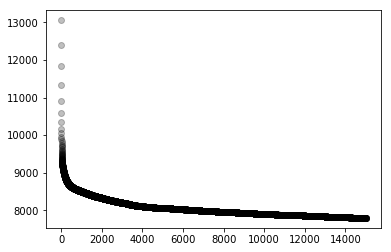

In [42]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [43]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

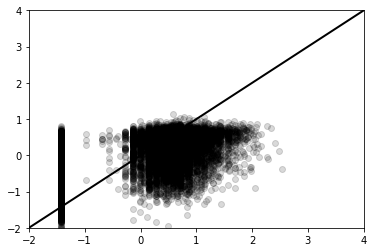

In [44]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [45]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3242.3872
[torch.FloatTensor of size 1]

In [46]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.1760
[torch.FloatTensor of size 1]

In [47]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

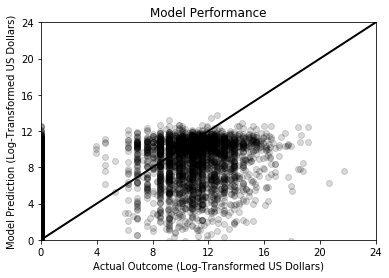

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [49]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.4581  0.0431  0.0890  0.4769 -0.3845  0.3615 -0.5745  0.0348  0.2109  0.0897
 0.1981  0.0527  0.2345 -0.2319  0.0299 -0.1878 -0.0885  0.0503 -0.3259 -0.1107
 0.4531 -0.2946  0.0360 -0.0143 -0.0805  0.0090 -0.2958 -0.2157  0.1934 -0.0780
-0.1375  0.0099 -0.1174  0.0034  0.0863 -0.1274  0.0911  0.0529 -0.1389 -0.0691
 0.1592  0.0673 -0.0880  0.1206  0.0240  0.0077  0.1852 -0.1910 -0.0928  0.0290
-0.1914 -0.1184  0.1327 -0.3722  0.4134 -0.2262  0.0877 -0.0924  0.0574  0.1055
-0.1954  0.1527 -0.0401 -0.1208  0.0592 -0.4367  0.1955 -0.1195 -0.1032  0.1588
-0.1233 -0.1538  0.2342  0.1745 -0.2055  0.0675 -0.4210  0.3444 -0.0923 -0.2742
 0.1368  0.3212  0.1415 -0.2331  0.0888  0.1691  0.0548 -0.2619  0.0293  0.3010
 0.1186  0.3637  0.1059  0.0993 -0.0751  0.3541  0.0272 -0.2128  0.5366  0.0474
 0.2364  0.0410 -0.1895 -0.0638  0.1207 -0.0260 -0.0140 -0.1017  0.1149  0.0710
 0.2941 -0.2994  0.3219 -0.0152  0.1860  0.0502 -0.3446  0.1104  0.1689  0.4867
 

In [50]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.2244 -0.3018  0.5076  0.0866  0.1714  0.3099 -0.0331 -0.0408 -0.5011  0.0710
-0.6927 -0.2296  0.4118  0.3442 -0.1054  0.0323  0.1767  0.2770 -0.4582  0.1279
-1.3305  0.4412 -0.4336  0.1941 -1.1781 -0.6822  0.2249  0.3927  0.2035  0.2870
-0.0230 -0.1303 -0.1619  0.0420  0.1863  0.1292 -0.7954 -0.1593 -0.0764  0.1734
-0.5384  0.5183 -0.1345  0.0419  0.1232 -0.2628  0.4847  0.4734  0.1412 -0.0978
 0.3020  0.3003 -0.3669  0.2578 -0.1282  0.2679  0.4543  0.3621  0.0098  0.2413
 0.6984  0.1908  0.2618 -0.0292 -0.0664  0.5571  0.4227 -0.1118 -0.2975  0.1144
-0.3178  0.4010  0.0246  0.1374 -0.0528  0.1358 -0.2334  0.2054 -0.3630  0.3823
 0.2239 -0.6202  0.3072  0.2538  0.0212  0.1920 -0.0828  0.3417 -0.2571  0.1883
 0.1148  0.0689  0.2868  0.0426  0.1814  0.1225  0.0182  0.1137 -0.2435  0.3327
 0.0964 -0.3485  0.4333  0.0580  0.1769  0.0396  0.0131  0.0888  0.2386 -0.4106

Columns 10 to 15 
-0.0133 -0.1818 -0.2838 -0.0337 -1.1507 -0.0516
-0.2392  0.329

In [51]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.3754  0.1110 -2.4075  0.0095 -0.1750  0.4873 -0.3426  0.0371 -0.0040 -0.0561
 0.1811 -1.1204  0.0093 -0.6419  0.4023  0.0921  0.2731 -0.1807  0.0768  0.0923
 0.4153 -0.1984 -0.9647  0.4979  0.2581  0.1571 -0.0211  0.6533 -0.3571  0.3069
 0.4605  0.2835 -2.1103  0.0167 -0.0940  0.3694 -0.6023  0.1966 -0.2426  0.2492
 0.3328  0.0727  0.1433  0.2782  0.2959  0.2122  0.3190  0.3872 -0.4682 -0.2072
 0.6499 -0.1215 -1.4405  0.5557 -0.0173  0.4834 -0.5408  0.2425 -0.1524  0.6638
-0.0633 -0.0277 -0.4636  0.0754 -0.2000 -0.0690 -0.3092  0.2591  0.2989  0.2013

Columns 10 to 10 
 0.2924
-0.4691
 0.2674
 0.4312
 0.1697
 0.4999
 0.3604
[torch.FloatTensor of size 7x11]

In [52]:
model[(6)].weight

Parameter containing:
-0.8738  0.7991 -0.5441 -1.0623 -0.5213 -1.2802 -0.5543
[torch.FloatTensor of size 1x7]

## Round 4: Four-Hidden-Layer Neural Network

In [53]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [54]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [55]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

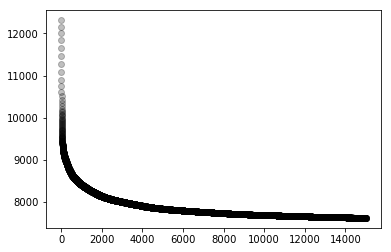

In [56]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

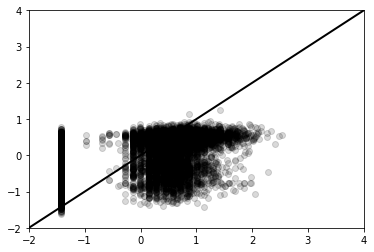

In [58]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [59]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3318.3701
[torch.FloatTensor of size 1]

In [60]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.1567
[torch.FloatTensor of size 1]

In [61]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

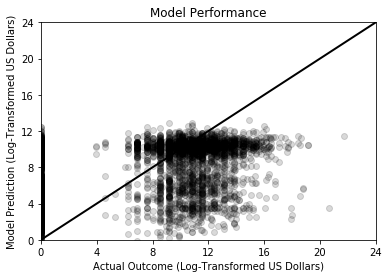

In [62]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [63]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.5287  0.0542 -0.1994 -0.1199 -0.2930  0.0264 -0.0936  0.0575 -0.0761 -0.1067
 0.3194 -0.0147  0.0295  0.3878 -0.2586  0.0223 -0.3943 -0.0708  0.2330  0.5657
 0.3162  0.0149 -0.2122 -0.0476 -0.3848  0.0320 -0.1916  0.0943 -0.1421 -0.2017
-0.1814  0.1317  0.2717  0.0308  0.0519 -0.3469  0.3315  0.0519 -0.1973 -0.2940
-0.0282 -0.1373  0.1076  0.3526 -0.3525  0.0374 -0.2421  0.0688  0.1690  0.1905
 0.1118 -0.0707 -0.2790  0.0232 -0.5904  0.0670 -0.6148  0.1448 -0.0242 -0.1748
-0.1112 -0.4347 -0.0424  0.1071 -0.3206 -0.0343 -0.0871  0.1509 -0.0548 -0.1789
 0.4866 -0.1298 -0.0365 -0.0812 -0.1956  0.0254 -0.3439 -0.1901  0.5502  0.0365
-0.0466 -0.0938 -0.1040 -0.0815  0.2112 -0.2432 -0.0460  0.0975  0.0359  0.0471
-0.0848 -0.1904 -0.1899  0.0256  0.0292 -0.0117 -0.1772  0.0049 -0.0501 -0.2822
 0.4045 -0.4825 -0.0195 -0.1383  0.2416 -0.1697 -0.4909 -0.0665 -0.5715 -0.1992
 0.2480  0.3307 -0.0248  0.0463  0.1894 -0.1077  0.2985 -0.1453  0.2350  0.0484
-

In [64]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1284 -0.1160  0.3387 -0.4192 -0.0488  0.0948  0.2876  0.1643 -0.1195  0.4434
 0.3605 -0.2083  0.2473 -0.0534 -0.0288  0.0288 -0.3183 -0.0168  0.3603  0.5634
-0.1123 -0.0454  0.2539  0.2470  0.3527 -0.5136  0.4091  0.3871  0.2314  0.3487
 0.3057 -0.3661 -0.2000 -0.2710 -0.4630 -0.3880  0.1738  0.1227 -0.5326 -1.0413
-0.5128  0.0501  0.0966 -1.7059 -0.5967  0.5226  0.4319 -0.1477  0.2140 -0.5421
-0.2637  0.1525  0.1872 -0.2376 -0.5737  0.2107 -0.1143  0.2992 -0.0178  0.2241
 0.4066  0.0094 -0.1960 -0.0177  0.0644 -0.6905  0.6805 -0.2658  0.1989 -0.2355
 0.2779  0.5678  0.0461 -0.1084 -0.7902  0.2754  0.0293  0.2553 -0.2928 -0.3100
 0.0745  0.2130  0.0573  0.0874  0.5508  0.2015 -0.2850  0.1968 -0.0144  0.1316
 0.0305  0.1026 -0.2744 -0.2725 -0.3730  0.4580  0.1425 -0.0862  0.0860  0.2116
 0.5557  0.0205  0.5014  0.2158 -0.0573 -0.0630 -0.2903  0.2928 -0.0320  0.1525

Columns 10 to 15 
 0.0609 -0.2368 -1.2858  0.3158 -0.4544 -0.3778
-0.4866 -0.034

In [65]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1752  0.1057 -0.3041 -0.6137 -0.2468  0.3156  0.6114 -0.2922  0.2412  0.2303
-0.0290 -0.1534  0.1212  0.1207 -0.6260 -0.1875  0.0225  0.1877 -0.0725 -0.0703
 0.3931 -0.2891 -0.2251  0.8326  0.6151 -0.1849 -1.4011  0.5089 -0.4863 -0.0522
 0.4886 -0.0047 -0.0117 -0.1135  0.5233 -0.2494  0.0559  0.3383 -0.0135 -0.2071
 0.0880  0.2297  0.1938 -0.6345  0.1527  0.1535  0.0133 -0.1838 -0.1841  0.2464
 0.2154  0.0656 -0.8357 -0.1971  0.4228 -0.1671  0.0071  0.0065  0.0345 -0.0113
-0.6426 -1.2534  0.2602  0.5484 -1.7744  0.3014  0.1498  0.7813 -1.0908 -0.3950

Columns 10 to 10 
 0.3462
 0.0424
-0.3665
-0.2472
 0.2158
-0.2902
-0.3866
[torch.FloatTensor of size 7x11]

In [66]:
model[(6)].weight

Parameter containing:
 0.0190  0.3540 -1.7610 -0.0821  0.0053  0.2581 -3.0922
 0.1512  0.2558 -0.6754 -0.2916  0.0389  2.0574 -2.4983
-1.1649  0.6507  0.4201  0.4758 -0.7853 -0.1735 -0.0907
 0.0760 -0.0646 -0.0609  0.3995  0.1251  1.1241 -2.4938
 0.3212  0.0397 -0.3239  0.1238  0.1773  0.4414 -2.3852
[torch.FloatTensor of size 5x7]

In [67]:
model[(8)].weight

Parameter containing:
 1.5695  0.9056 -0.6956  0.4801  0.3371
[torch.FloatTensor of size 1x5]

## Round 5: Five-Hidden-Layer Neural Network

In [68]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [69]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [70]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

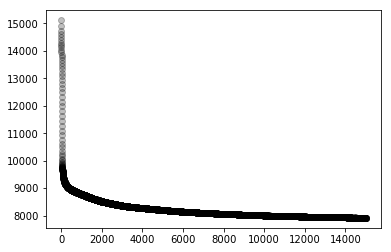

In [71]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

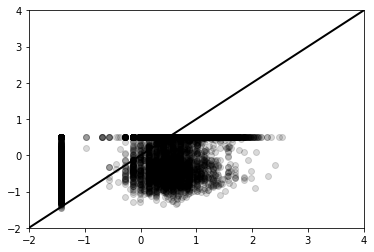

In [73]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [74]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3314.9441
[torch.FloatTensor of size 1]

In [75]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.1576
[torch.FloatTensor of size 1]

In [76]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

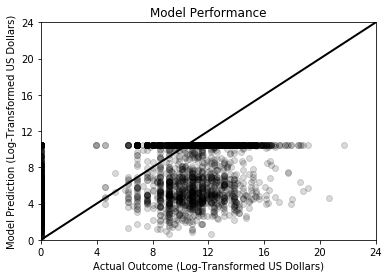

In [77]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [78]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1703 -0.1025  0.3134  0.2008  0.2866  0.4244  0.6086  0.0177  0.1467 -0.0577
 0.4163 -0.0341 -0.0552 -0.0828 -0.5838  0.4931 -0.2148 -0.4524 -0.3820 -0.2229
-0.0651 -0.1734  0.0331 -0.1233 -0.0349 -0.0310  0.0902  0.1086 -0.2522 -0.3601
-0.0887 -0.4154  0.0177  0.2646 -0.1266 -0.2053 -0.2206 -0.0543 -0.2997 -0.0478
 0.1130  0.1005 -0.6724  0.1907 -0.0864  0.0955 -0.1788  0.2408 -0.3895 -0.3793
 0.2128 -0.3540  0.0877 -0.2139 -0.2256 -0.0207 -0.0149 -0.0757 -0.1529 -0.1002
 0.0410 -0.0992 -0.3324 -0.4126 -0.4056  0.2435 -0.1259  0.0759  0.4104 -0.4129
-0.1395 -0.0637  0.3344  0.0910 -0.0889  0.0222  0.1141 -0.1999  0.1500 -0.2192
 0.5896 -0.5322 -0.3965  0.1483  0.1405 -0.1090 -0.4730 -0.1354 -0.0227 -0.0226
-0.1651 -0.4496 -0.0433  0.1052  0.1294 -0.1992 -0.0639  0.1368 -0.3528  0.1785
 0.0874 -0.3833 -0.0669 -0.4174 -0.1036  0.0784  0.4553  0.0268  0.2840  0.0855
 0.0037 -0.1435  0.2152  0.5913 -0.4162  0.0601 -0.1668  0.1550  0.3899  0.2631
-

In [79]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.5106  0.4507  0.3354  0.3091  0.2497  0.2094  0.2499  0.3525  0.3241  0.3290
-0.4943  0.1473 -0.2778  0.0371  0.1747  0.4898  0.1162 -0.2868  0.3111 -0.2566
-0.1179  0.2717  0.0741  0.3462  0.1612 -0.4027  0.3800  0.0481 -0.0862 -0.1135
-0.2198 -0.8153 -0.2165  0.0359 -0.0830 -0.0905  0.0242 -0.3528  0.0631 -1.3751
-0.0377  0.2840 -0.5679 -0.1773 -0.1452 -0.8576 -0.3463  0.4540 -0.7420  0.4476
 0.3383 -0.1178  0.3597  0.3147 -0.1112  0.0348  0.2055  0.0101  0.2484  0.1499
 0.2198  0.4691  0.3001  0.3863  0.3079  0.3118  0.1130  0.0417  0.0018  0.4998
-0.4464 -0.1254  0.2540 -0.3990 -0.0829 -0.5764 -0.7436  0.5385 -0.0866 -0.2870
 0.2490 -0.0833 -0.4594  0.0890 -0.3248  0.0962  0.2168 -0.1768 -0.2417 -0.5419
 0.0840  0.6188  0.2962  0.1810  0.1877 -0.0598 -0.0173  0.0109  0.5963 -0.1437
 0.1769  0.1148  0.5964 -0.0907  0.4483  0.2391  0.1766 -0.1965  0.3026 -0.1852

Columns 10 to 15 
 0.0355 -0.0912 -0.0448  0.3306  0.2021  0.3320
-0.2616  0.299

In [80]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.3630 -0.7710  0.3847  1.5691 -0.3154  0.4603  0.1021 -0.9774 -0.4714  0.2509
 0.1037 -0.6048 -0.2891  1.2311 -0.5321 -0.1251 -0.0771  1.0803  0.7183 -0.9921
-0.0996  0.4290 -0.0373 -3.0109 -1.6087  0.3683 -0.0654  0.1106 -0.1088  0.3815
-0.3103  0.5581  0.1801 -1.6253 -0.6888 -0.5762 -0.0249  0.6392  0.7759  0.3624
-0.1262  0.1799 -0.8252 -1.9063  0.3538  0.5571 -0.0854 -0.6216 -0.9632 -0.1120
-0.0143  0.2889  0.0430  1.1594 -0.8487  0.0617 -0.0690  0.6804  0.4451 -0.0467
 0.5241 -0.6017  0.4139  1.7877 -0.7839  0.2128  0.3755 -0.4648 -0.4219  0.2032

Columns 10 to 10 
 0.3674
-0.1341
 0.0928
 0.2429
 0.2634
 0.2456
 0.4058
[torch.FloatTensor of size 7x11]

In [81]:
model[(6)].weight

Parameter containing:
-0.1242 -0.0255  0.2483 -0.0735 -0.2446  0.1892 -0.3597
 0.1896  2.1186  0.2097  0.5616  0.7517  0.4535 -0.4335
-0.3285  2.1889 -0.0191  0.5226  1.2880  0.4741 -0.0603
 0.1841 -1.1090 -0.5989 -0.3390  0.0966  0.4435  0.5222
-0.2182  1.9855  0.0050  0.4621  2.4746  0.4352 -0.1080
[torch.FloatTensor of size 5x7]

In [82]:
model[(8)].weight

Parameter containing:
-0.3620 -0.4432  0.2716 -0.1194 -0.0071
-0.2355 -0.8281 -1.8028  0.1054 -1.6623
 0.2901 -1.1607 -1.4110  0.1929 -1.7940
[torch.FloatTensor of size 3x5]

In [83]:
model[(10)].weight

Parameter containing:
-0.3762 -0.4997 -0.6942
[torch.FloatTensor of size 1x3]

## Round 6: Six-Hidden-Layer Neural Network

In [84]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [85]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [86]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

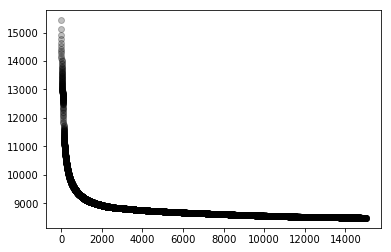

In [87]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [88]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

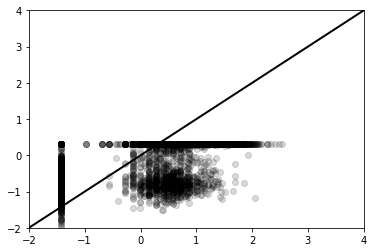

In [89]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [90]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3358.7104
[torch.FloatTensor of size 1]

In [91]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.1465
[torch.FloatTensor of size 1]

In [92]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

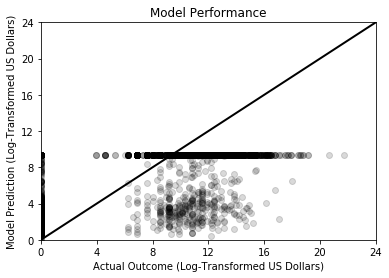

In [93]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [94]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.3627  0.0079 -0.3534  0.0806  0.1224 -0.1903  0.1587 -0.3218  0.3375 -0.1517
-0.3447  0.1984 -0.1853 -0.4137  0.2559 -0.0692  0.6407  0.1065  0.4480  0.2485
 0.2114  0.0779 -0.0901 -0.0613 -0.2731 -0.1815 -0.2592 -0.2315 -0.1828  0.0986
 0.3563 -0.2921 -0.1073 -0.0851  0.0725 -0.2604 -0.3837 -0.2242 -0.1163 -0.0588
 0.1477  0.1427  0.0085  0.2558 -0.0813  0.1373  0.2823 -0.2361 -0.0601  0.1206
-0.1647  0.3410 -0.1827 -0.1794  0.0027 -0.3372 -0.1364 -0.1966 -0.2174  0.1084
 0.1364  0.2349  0.1266 -0.1078  0.1232  0.0511 -0.1019 -0.0796 -0.1268  0.3686
-0.1410  0.4532  0.3024  0.1102 -0.0331 -0.2520 -0.2925 -0.1831 -0.1888 -0.0955
 0.2170 -0.0486 -0.0866 -0.0312 -0.2970 -0.3094 -0.3240  0.0883 -0.2313  0.0864
-0.0040 -0.0767  0.1449 -0.0197 -0.1297  0.1320  0.2449  0.0872  0.1814  0.0326
-0.2804  0.0333  0.4021  0.0142  0.1901 -0.2480 -0.1589 -0.1327 -0.3843 -0.0274
-0.0771  0.0044  0.0994  0.1342  0.1239 -0.1314  0.2824  0.0235  0.3574 -0.1079
 

In [95]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3396 -0.1232  0.2237  0.0916 -0.1887  0.1736  0.2591  0.0811 -0.2280  0.2231
 0.2320  0.0887  0.1681 -0.0386 -0.1670 -0.1150  0.0631  0.1899 -0.2100  0.1512
 0.2291  0.7373 -0.2130  0.0420  0.5080  0.6948 -0.3901  0.1741 -0.1034 -0.1908
-0.0159  0.5941 -0.3908  0.4056  0.2901  0.0591 -0.1767  0.4018  0.0614  0.2817
 0.0673  0.1647 -0.1245  0.1324 -0.0342 -0.2552  0.1336  0.4830  0.1898  0.3286
 0.1132  0.8060  0.2656  0.1334  0.3311  0.1676  0.1072  0.2702 -0.0346 -0.0831
 0.1370  0.5918 -0.1498  0.4241  0.1922  0.3678 -0.4973  0.1772  0.2055  0.2176
 0.0494  0.4943  0.0472 -0.0816  0.0409  0.6385  0.3149  0.0847  0.0891  0.3937
 0.2986  0.1478  0.3696 -0.4682 -0.1897 -0.1694  0.1479  0.5035 -0.3500  0.3426
 0.2904 -0.0422  0.0926 -0.1552 -0.0757 -0.1913  0.4927  0.0539 -0.1431  0.0410
 0.0710  0.0740  0.0937  0.1136 -0.2554 -0.2710  0.1708  0.1885 -0.0966  0.2646

Columns 10 to 15 
 0.4785 -0.1143 -0.1679  0.6160  0.3709 -0.1028
 0.0118  0.322

In [96]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.0313  0.4056 -0.2460  0.0296  0.1724  0.0108  0.2135  0.2984  1.4299  0.2463
-0.0480 -0.2610  0.1818  0.3357  0.2739  0.4202  0.4666  0.2260 -0.9828 -0.3547
 0.4658  0.4607 -0.2911  0.2337  0.4235 -0.1174 -0.2836 -0.0878  1.6540  0.2006
 0.0256  1.0503 -0.2352  0.3014  0.0433 -0.2080 -0.1466  0.1491  1.5836 -0.1198
 0.3014  0.2770  0.1384 -0.3653  0.1639  0.0354 -0.6798  0.3748  1.0494  0.0779
 0.3787  0.1641 -0.3163  0.0665 -0.2383  0.2844 -0.3058 -0.3031  1.8247  0.3576
 0.4753  0.5423  0.0187  0.0141  0.2721 -0.1134 -0.2850  0.0212  1.1326  0.0306

Columns 10 to 10 
 0.1222
-0.2605
 0.3531
 0.6669
 0.0119
 0.4500
 0.1865
[torch.FloatTensor of size 7x11]

In [97]:
model[(6)].weight

Parameter containing:
-0.0717  0.2893 -0.1562  0.3763 -0.9156 -0.6417 -0.4998
 0.3635  0.2214 -0.4802  0.5953 -1.2741 -0.6217 -0.1222
 0.2363 -0.0223  0.4449 -0.0134  1.1134  0.9487  0.4891
-0.0338 -0.0180  0.2454  0.2929  0.9886  0.4482  0.4749
 0.5609 -0.5463  0.6708  0.4721  1.5525  1.2563  0.2518
[torch.FloatTensor of size 5x7]

In [98]:
model[(8)].weight

Parameter containing:
 0.3324  0.1809 -0.4835 -0.4567 -1.2158
 0.3759  0.0780 -0.7147  0.2341 -1.1963
 0.0973  0.3110 -0.8377  0.1049 -1.3193
[torch.FloatTensor of size 3x5]

In [99]:
model[(10)].weight

Parameter containing:
 0.2606  1.0155  1.0354
 0.9561  0.6434  0.8384
[torch.FloatTensor of size 2x3]

In [100]:
model[(12)].weight

Parameter containing:
-0.2645 -0.6221
[torch.FloatTensor of size 1x2]

## Round 7: Linear Regression

In [101]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [102]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(24, 1))

In [103]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

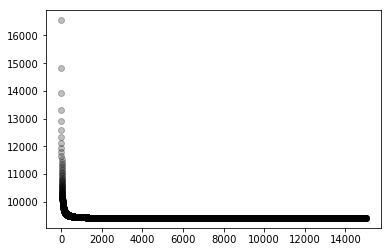

In [104]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [105]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

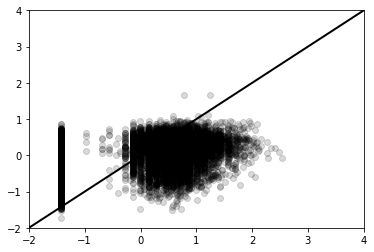

In [106]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [107]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3193.5930
[torch.FloatTensor of size 1]

In [108]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.1884
[torch.FloatTensor of size 1]

In [109]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

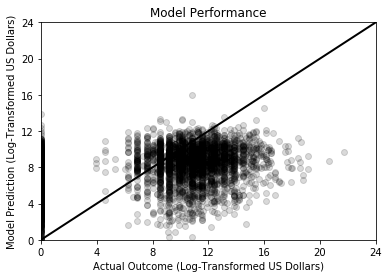

In [110]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [111]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0068  0.1075 -0.0014 -0.0129 -0.0011 -0.0727  0.0416 -0.0035  0.0946  0.0910

Columns 10 to 19 
-0.0043 -0.0200 -0.0581  0.0439  0.0159  0.0277  0.0027 -0.1834 -0.0438  0.1719

Columns 20 to 23 
 0.1299  0.0085  0.0449  0.0474
[torch.FloatTensor of size 1x24]